In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [3]:
sim1 = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/garch_midas_sim/sim60.csv')
sim2 = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/garch_midas_sim/sim120.csv')
sim3 = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/garch_midas_sim/sim180.csv')

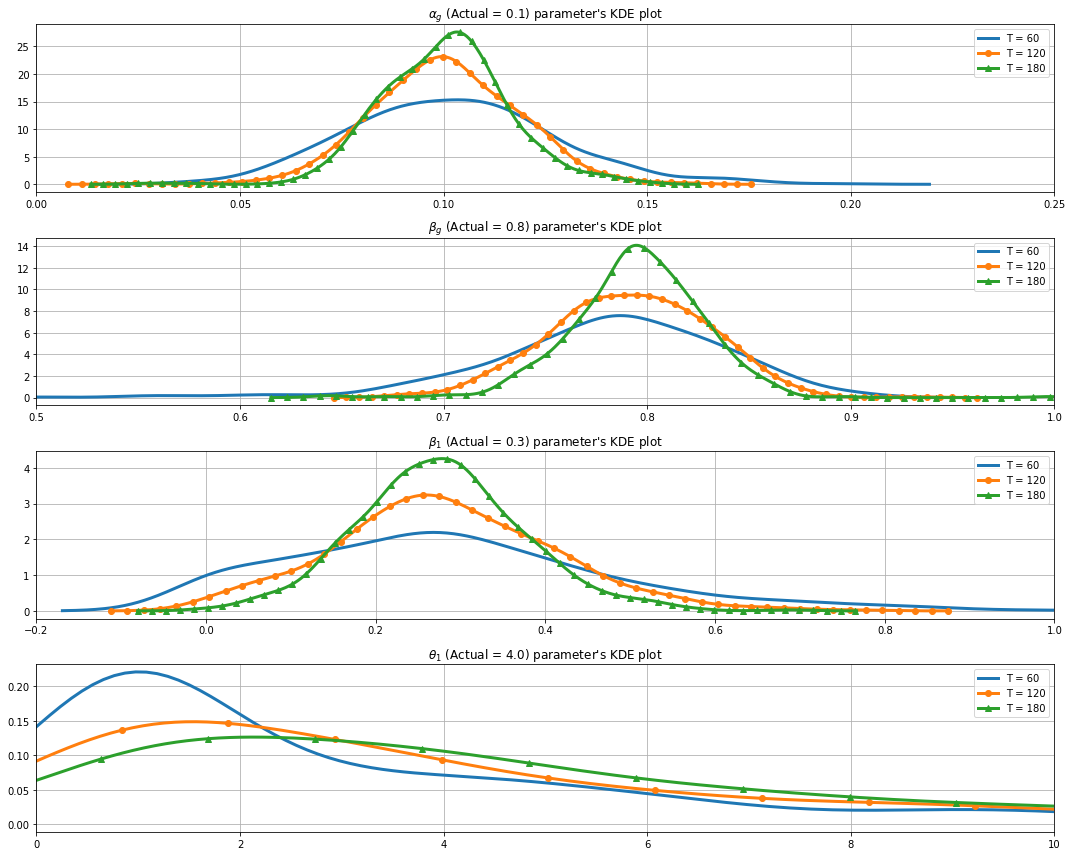

In [38]:
sim1_ag = sm.nonparametric.KDEUnivariate(sim1['alpha_g'].values).fit()
sim2_ag = sm.nonparametric.KDEUnivariate(sim2['alpha_g'].values).fit()
sim3_ag = sm.nonparametric.KDEUnivariate(sim3['alpha_g'].values).fit()

sim1_bg = sm.nonparametric.KDEUnivariate(sim1['beta_g'].values).fit()
sim2_bg = sm.nonparametric.KDEUnivariate(sim2['beta_g'].values).fit()
sim3_bg = sm.nonparametric.KDEUnivariate(sim3['beta_g'].values).fit()

sim1_b0 = sm.nonparametric.KDEUnivariate(sim1['beta_0'].values).fit()
sim2_b0 = sm.nonparametric.KDEUnivariate(sim2['beta_0'].values).fit()
sim3_b0 = sm.nonparametric.KDEUnivariate(sim3['beta_0'].values).fit()

sim1_th = sm.nonparametric.KDEUnivariate(sim1['theta'].values).fit(clip = (0.0,50.0))
sim2_th = sm.nonparametric.KDEUnivariate(sim2['theta'].values).fit(clip = (0.0,50.0))
sim3_th = sm.nonparametric.KDEUnivariate(sim3['theta'].values).fit(clip = (0.0,50.0))

fig, ax = plt.subplots(4, 1, figsize = (15,12), tight_layout = True)

ax[0].plot(sim1_ag.support, sim1_ag.density, lw = 3, label = 'T = 60')
ax[0].plot(sim2_ag.support, sim2_ag.density, lw = 3, marker = 'o', markevery = 10, label = 'T = 120')
ax[0].plot(sim3_ag.support, sim3_ag.density, lw = 3, marker = '^', markevery = 10, label = 'T = 180')
ax[0].set_title(r"$\alpha_g$ (Actual = 0.1) parameter's KDE plot")
ax[0].grid(True)
ax[0].set_xlim((0.0, 0.25))
ax[0].legend(loc = 'best')

ax[1].plot(sim1_bg.support, sim1_bg.density, lw = 3, label = 'T = 60')
ax[1].plot(sim2_bg.support, sim2_bg.density, lw = 3, marker = 'o', markevery = 10, label = 'T = 120')
ax[1].plot(sim3_bg.support, sim3_bg.density, lw = 3, marker = '^', markevery = 10, label = 'T = 180')
ax[1].set_title(r"$\beta_g$ (Actual = 0.8) parameter's KDE plot")
ax[1].grid(True)
ax[1].set_xlim((0.5, 1.0))
ax[1].legend(loc = 'best')

ax[2].plot(sim1_b0.support, sim1_b0.density, lw = 3, label = 'T = 60')
ax[2].plot(sim2_b0.support, sim2_b0.density, lw = 3, marker = 'o', markevery = 10, label = 'T = 120')
ax[2].plot(sim3_b0.support, sim3_b0.density, lw = 3, marker = '^', markevery = 10, label = 'T = 180')
ax[2].set_title(r"$\beta_1$ (Actual = 0.3) parameter's KDE plot")
ax[2].grid(True)
ax[2].set_xlim((-0.2, 1.0))
ax[2].legend(loc = 'best')

ax[3].plot(sim1_th.support, sim1_th.density, lw = 3, label = 'T = 60')
ax[3].plot(sim2_th.support, sim2_th.density, lw = 3, marker = 'o', markevery = 10, label = 'T = 120')
ax[3].plot(sim3_th.support, sim3_th.density, lw = 3, marker = '^', markevery = 10, label = 'T = 180')
ax[3].set_title(r"$\theta_1$ (Actual = 4.0) parameter's KDE plot")
ax[3].grid(True)
ax[3].set_xlim((0.0, 10))
ax[3].legend(loc = 'best')

#plt.savefig('C:/Users/peter/Desktop/volatility-forecasting/results/garch_midas_sim/gm_sim.png')
plt.show()